# Os efeitos da pandemia e mudança de governos sobre o preço de combustível 

Neste notebook, iremos analizar como a pandemia e a mudança de governo impactaram no preço do combustível.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import seaborn as sb

# Ações PETR3

In [77]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")

- Analisando as medidas de centralidade e dispersão das variáveis disponíveis

In [78]:
print("Dados de máxima: ")
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Dados de máxima: 
Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [79]:
print("Dados de mínima: ")
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Dados de mínima: 
Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


Aqui, observamos a relação entre os valores máximos e mínimos das ações

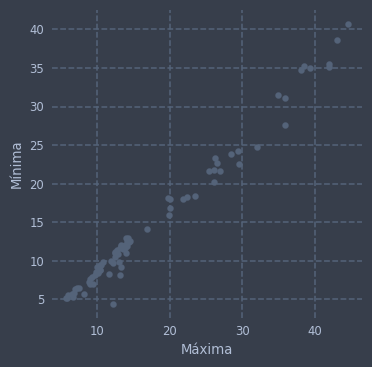

In [80]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

Relação entre o volume e os mínimos das ações

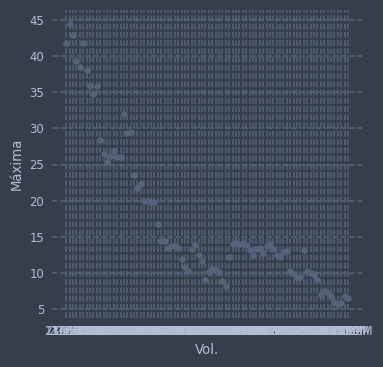

In [81]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

Relação entre os valores máximos e variancia das ações

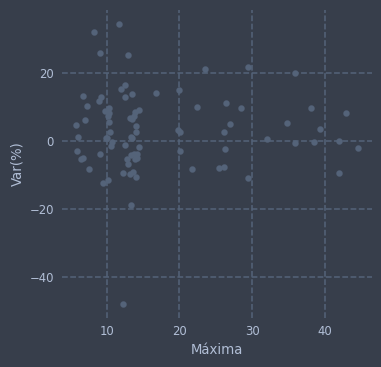

In [82]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [83]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [84]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


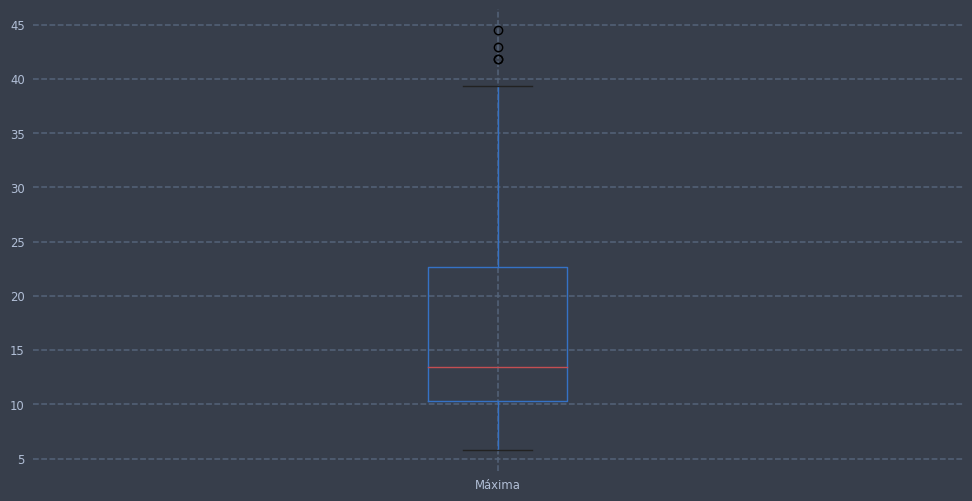

In [85]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

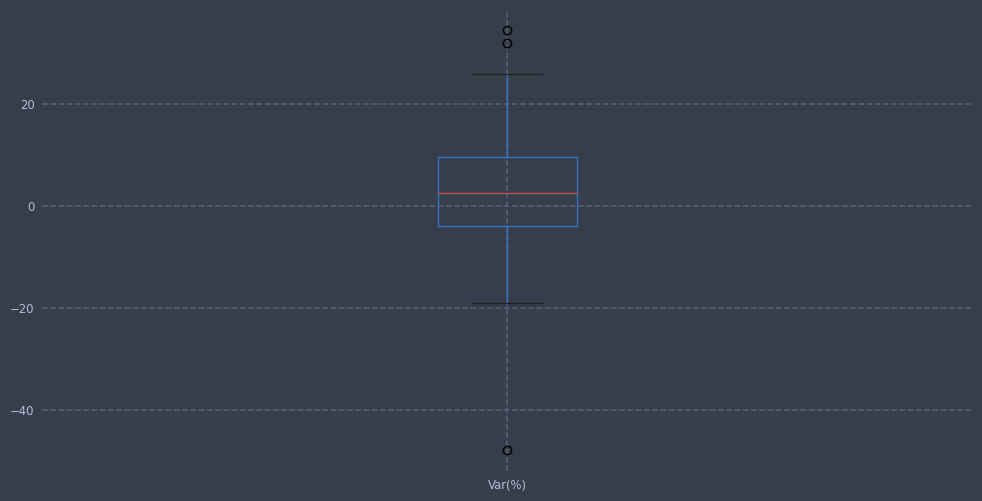

In [86]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

# IDH


In [87]:
#Lendo os dados da base
dataIdh = pd.read_csv("arquivos/IDH/idh.csv")

#Printando informações dos dados (Variancia, média, quartis, etc...)
print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())

var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


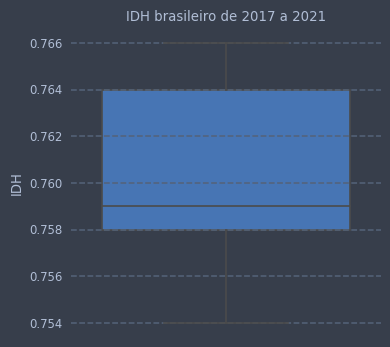

In [88]:
#Boxplot dos dados de referentes a IDH de 2017 a 2021
idhBox = sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

plt.ylabel("IDH")

plt.show(idhBox)

Podemos ver abaixo, como o IDH do Brasil se alterou com o tempo que a pandemia passou

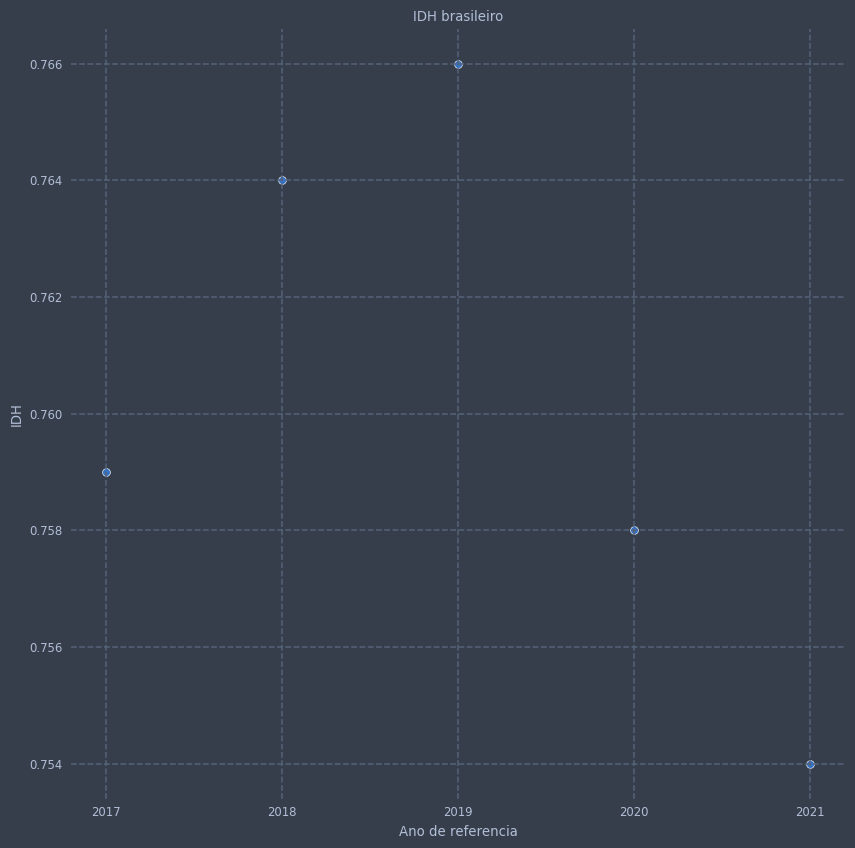

In [89]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(10,10))

#Criando gráfico de disperção com base nos anos e valores de idh
dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo valores do eixo x como múltiplos de 1 (Sem valores quebrados)
dispersaoIdh.xaxis.set_major_locator(ticker.MultipleLocator(1))

#Definindo títulos do gráfico
dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

#Exibindo o gráfico
plt.show()

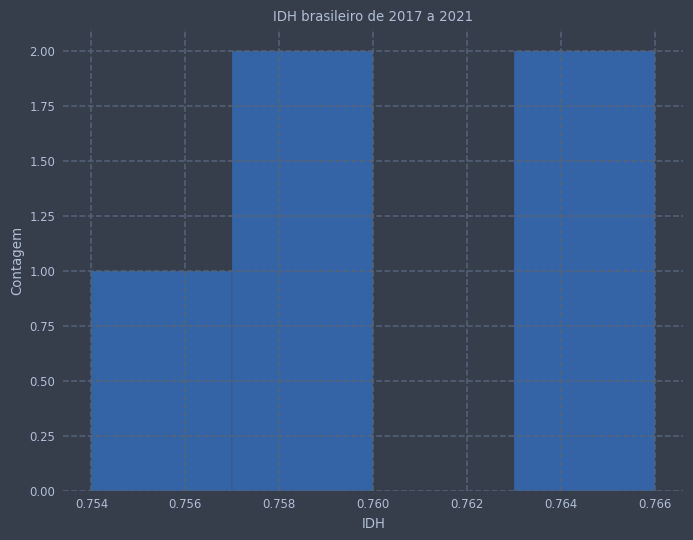

In [90]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Histograma dados dados de IDH entre 2017 e 2021
histIdh = sb.histplot(dataIdh, x='idh').set_title("IDH brasileiro de 2017 a 2021")

#Mudando o título dos eixos
plt.xlabel("IDH")
plt.ylabel("Contagem")

#Plotando os gráficos
plt.show()

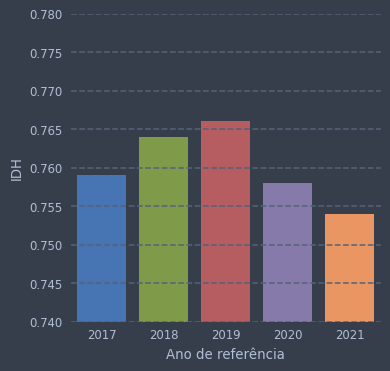

In [91]:
#Criando gráfico de barras com os dados de IDH ao longo dos anos
idhBar = sb.barplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo intervalo de valores do eixo y mostrado no gráfico
eixo = plt.gca()
eixo.set_ylim([0.74, 0.78])

#Alterando títulos dos eixos
plt.xlabel("Ano de referência")
plt.ylabel("IDH")

#Exibindo o gráfico
plt.show()

Abaixo, como o IDH de cada estado se comportou ao longo dos anos de pandemia

In [92]:
#Lendo os dados da base
dataIdhReg = pd.read_csv("arquivos/IDH/GDL-Subnational-HDI-data.csv")

#Separando os dados referentes ao Brasil
dataIdhReg = dataIdhReg.loc[dataIdhReg['Country'] == 'Brazil']

#Separando os dados de acordo com o intervalo de tempo que será analisado
dataIdhReg = dataIdhReg[['Region', '2017', '2018', '2019', '2020', '2021']]

#Removendo linha irrelevante
dataIdhReg = dataIdhReg.drop(209)

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIdhReg:
    if cln == 'Region': continue
    print(f'Var       {dataIdhReg[cln].var():.6f}')
    print(dataIdhReg[cln].describe())
    print()

Var       0.000725
count    27.000000
mean      0.749000
std       0.026932
min       0.703000
25%       0.732500
50%       0.748000
75%       0.764000
max       0.821000
Name: 2017, dtype: float64

Var       0.000730
count    27.000000
mean      0.753963
std       0.027016
min       0.708000
25%       0.737500
50%       0.753000
75%       0.769000
max       0.826000
Name: 2018, dtype: float64

Var       0.000748
count    27.000000
mean      0.756074
std       0.027357
min       0.709000
25%       0.739500
50%       0.755000
75%       0.771000
max       0.829000
Name: 2019, dtype: float64

Var       0.000731
count    27.000000
mean      0.747889
std       0.027040
min       0.702000
25%       0.731500
50%       0.746000
75%       0.763000
max       0.820000
Name: 2020, dtype: float64

Var       0.000724
count    27.000000
mean      0.744074
std       0.026899
min       0.698000
25%       0.727500
50%       0.743000
75%       0.759000
max       0.816000
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

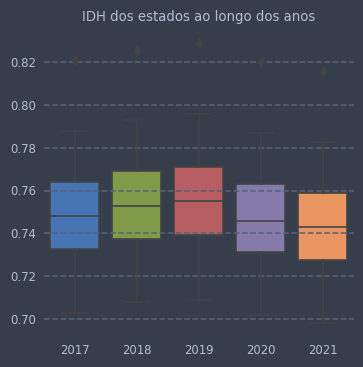

In [93]:
#Boxplot dos dados de IDH ao longo dos anos
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

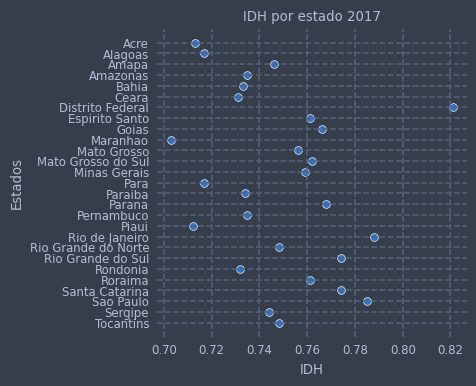

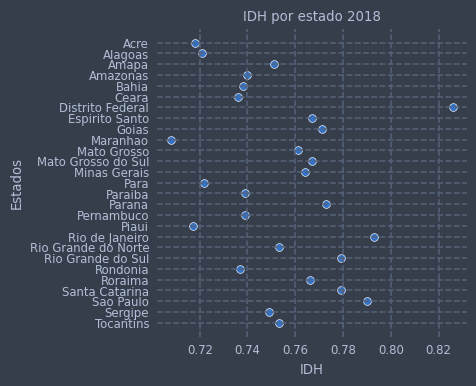

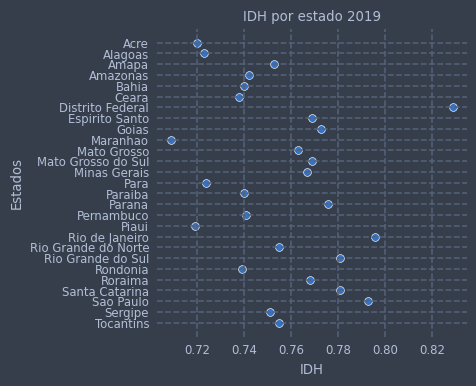

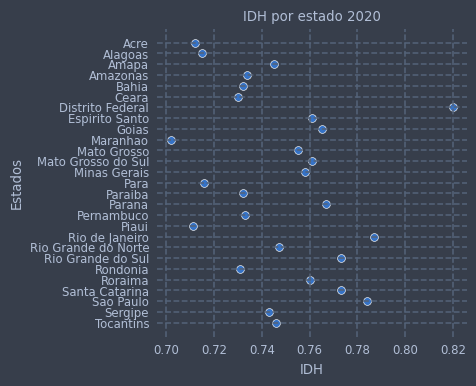

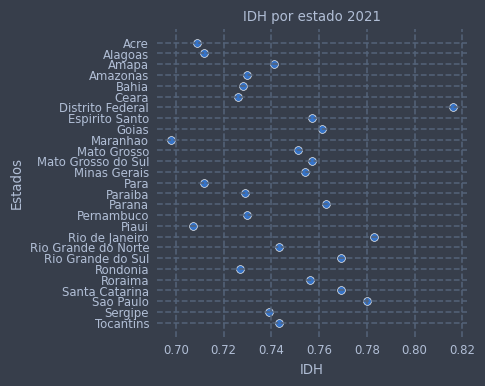

In [94]:
#Plotando gráficos de disperção dos dados de IDH dos estados brasileiros a cada ano entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')
    plt.show()

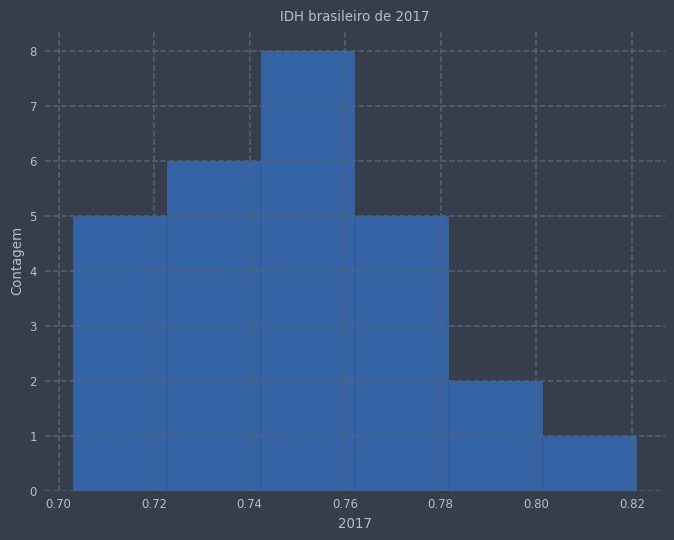

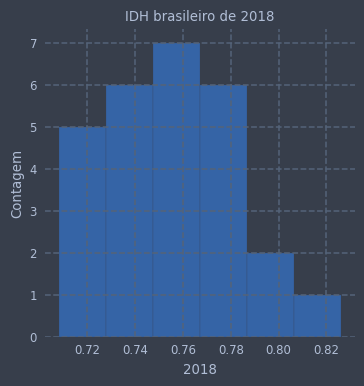

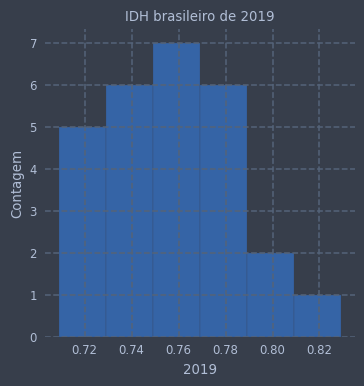

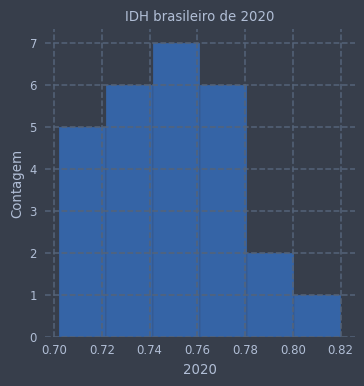

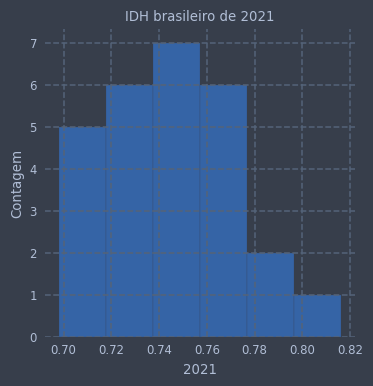

In [95]:
#Definindo o tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Plotando histogramas dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    histIdh = sb.histplot(dataIdhReg, x=cln).set_title(f"IDH brasileiro de {cln}")
    
    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando gráfico
    plt.show()

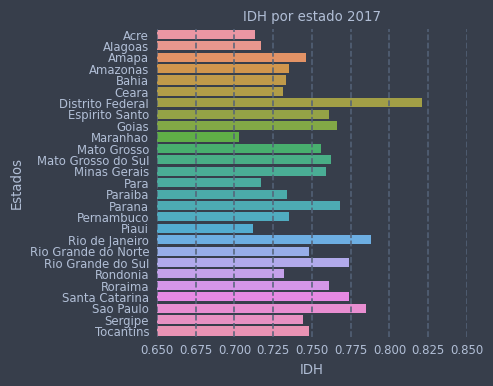

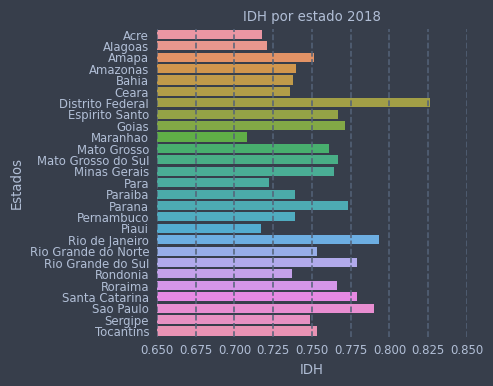

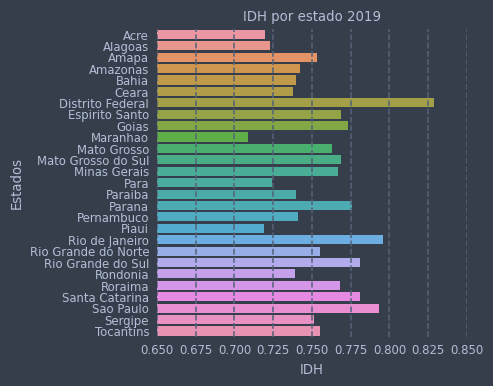

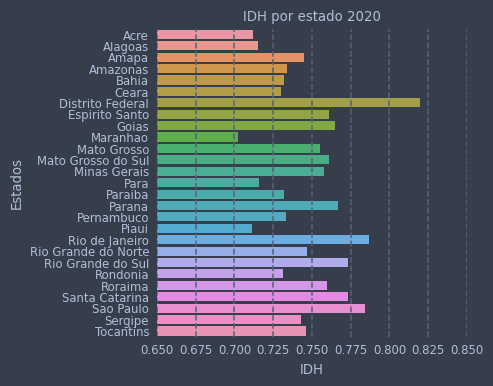

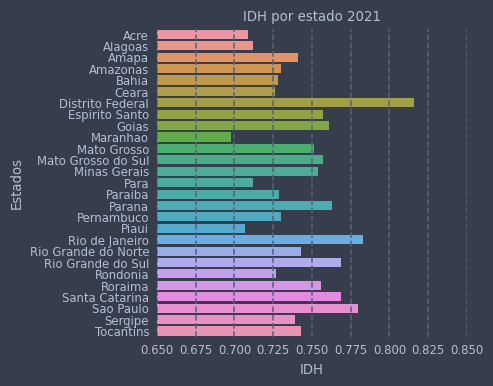

In [96]:
#Plotando gráficos de barra dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.barplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')

    #Definindo intervalo de valores do eixo x a ser exibido no gráfico
    eixo = plt.gca()
    eixo.set_xlim([0.65, 0.85])

    #Exibindo gráfico
    plt.show()

# Preço Combustível

In [19]:
preco_comb_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2016-a-2018.csv")
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()
df_local_media = df_local_media.to_frame().reset_index()
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)
df_final["MÊS"] = pd.to_datetime(df_final["MÊS"])
df_final = df_final.sort_values(by=["MÊS"])
df_final= df_final[df_final["PRODUTO"] == "GASOLINA COMUM"]
df_final = df_final.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2016_2018")

In [20]:
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])

In [21]:
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()

In [22]:
df_local_media = df_local_media.to_frame().reset_index()

In [23]:
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"

In [24]:
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)

In [25]:
df_final.to_csv("arquivos/Preco_Combustivel/novo_arquivo.csv", index=False)

In [26]:
df = pd.read_csv("arquivos/Preco_Combustivel/novo_arquivo.csv") 

In [27]:
df["MÊS"] = pd.to_datetime(df["MÊS"])

In [28]:
df = df.sort_values(by=["MÊS"])

In [29]:
df.to_csv("arquivos/Preco_Combustivel/PRECO_COMB", index=False)

In [30]:
precocombustivel_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB")

In [31]:
precocombustivel_df = precocombustivel_df[precocombustivel_df["PRODUTO"] == "GASOLINA COMUM"]

In [32]:
precocombustivel_df = df.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})

In [33]:
precocombustivel_df.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2016_2018") 

In [34]:
preco_comb2_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2019-a-2021.csv")
df_local2 = preco_comb2_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media2 = df_local2["PREÇO MÉDIO REVENDA"].mean()
df_local_media2 = df_local_media2.to_frame().reset_index()
df_brasil2 = preco_comb2_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil2["REGIÃO"] = "BRASIL"
df_final2 = pd.concat([df_local_media2, df_brasil2], ignore_index=True)
df_final2["MÊS"] = pd.to_datetime(df_final2["MÊS"])
df_final2 = df_final2.sort_values(by=["MÊS"])
df_final2= df_final2[df_final2["PRODUTO"] == "GASOLINA COMUM"]
df_final2 = df_final2.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final2.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2019_2021")

In [35]:
precocombustivel19_21_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2019_2021")

In [36]:
preco_comb3_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal_municipios-desde_jan2022_a_2024.csv")
df_local3 = preco_comb3_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media3 = df_local3["PREÇO MÉDIO REVENDA"].mean()
df_local_media3 = df_local_media3.to_frame().reset_index()
df_brasil3 = preco_comb3_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil3["REGIÃO"] = "BRASIL"
df_final3 = pd.concat([df_local_media3, df_brasil3], ignore_index=True)
df_final3["MÊS"] = pd.to_datetime(df_final3["MÊS"])
df_final3 = df_final3.sort_values(by=["MÊS"])
df_final3= df_final3[df_final3["PRODUTO"] == "GASOLINA COMUM"]
df_final3 = df_final3.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final3.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2022_2024")


In [37]:
precocombustivel22_24_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2022_2024")

In [38]:
precocombustivel22_24_df

,MÊS,PREÇO MÉDIO REVENDA
0,2022-01-01,6.736561
1,2022-01-02,6.709887
2,2022-01-03,7.108884
3,2022-01-04,7.335032
4,2022-01-05,7.379761
5,2022-01-06,7.365138
6,2022-01-07,6.156560
7,2022-01-08,5.510157
8,2022-01-09,5.153197
9,2022-01-10,4.918640


In [39]:
precomb_2017_2024 = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2017_2024.csv")

In [40]:
precomb_2017_2024

,MÊS,PREÇO MÉDIO REVENDA
0,2017-01-01,3.889706
1,2017-01-02,3.875514
2,2017-01-03,3.819460
3,2017-01-04,3.770485
4,2017-01-05,3.751664
...,...,...
80,2023-01-10,5.875074
81,2023-01-11,5.784060
82,2023-01-12,5.730224
83,2024-01-01,5.706699


In [41]:
# Selecionando coluna "Último"
petr3_df = petr3_df["Último"]

In [42]:
dfcombinados = precomb_2017_2024.join(petr3_df)
novoultimo = pd.read_csv("arquivos/Preco_Combustivel/novoultimo.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'arquivos/Preco_Combustivel/novoultimo.csv'

In [ ]:
dfcombinados["Último"] = novoultimo["ÚltimoFinal"]

In [ ]:
dfcombinados.to_csv("dfcombinadosfinal.csv")

In [ ]:
dfcombinadosfinal = pd.read_csv("arquivos/Preco_Combustivel/dfcombinadosfinal.csv")

In [45]:
dfcombinadosfinal

NameError: name 'dfcombinadosfinal' is not defined

In [ ]:
dfcombinadosfinal = dfcombinadosfinal.drop("Unnamed: 0", axis=1)

In [ ]:
dfcombinadosfinal

,MÊS,PREÇO MÉDIO REVENDA,Último
0,2017-01-04,3.770485,5.94
1,2017-01-05,3.751664,5.64
2,2017-01-06,3.696870,5.46
3,2017-01-07,3.689708,5.71
4,2017-01-08,3.911672,5.78
...,...,...,...
79,2023-01-11,5.784060,37.70
80,2023-01-12,5.730224,38.98
81,2024-01-01,5.706699,42.16
82,2024-01-02,5.864322,41.22


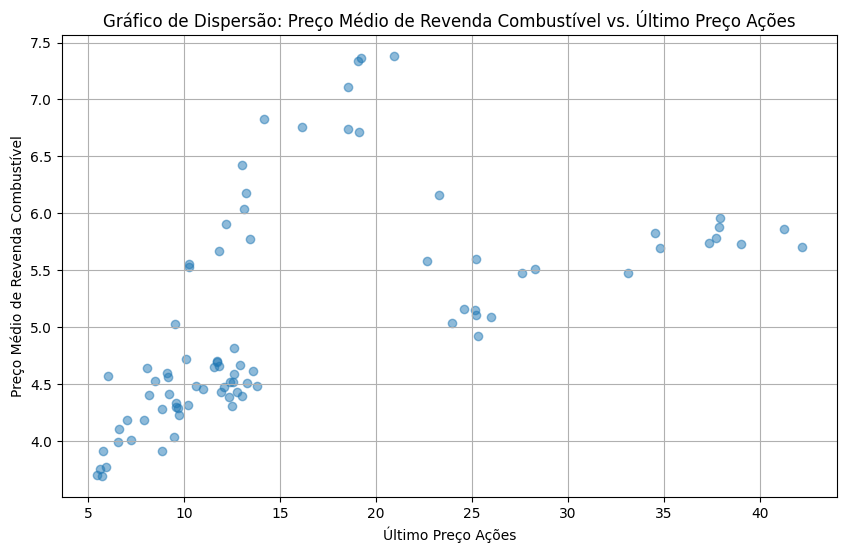

In [ ]:
preco_medio_revenda = dfcombinadosfinal['PREÇO MÉDIO REVENDA']
ultimo = dfcombinadosfinal['Último']

plt.figure(figsize=(10, 6))
plt.scatter(ultimo, preco_medio_revenda, alpha=0.5)

plt.title('Gráfico de Dispersão: Preço Médio de Revenda Combustível vs. Último Preço Ações')
plt.xlabel('Último Preço Ações')
plt.ylabel('Preço Médio de Revenda Combustível')

plt.grid(True)
plt.show()

# IPCA

In [106]:
#Criando dataframe pra receber dados do ipca de cada mes dos anos de 2017 a 2021
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

#criando tupla com todos os meses do ano
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
        "Novembro", "Dezembro")

#atribuindo os meses do ano à coluna "Mes"
for mes in meses:
    dataIpcaMedio = dataIpcaMedio._append({"Mes": mes}, ignore_index=True)

#For's para percorrer os arquivos com os dados
for j in range(17, 22): #For para os dados dos anos 2017 a 2021

    for i in range(1, 13): #For para os dados do mes de Janeiro a Dezembro

        if i < 10: #if para evitar erro no caminho até o arquivo
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}0{i}Subitem.csv")
        else:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i}Subitem.csv")
        
        #Atribuição dos dados ao dataframe
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIpcaMedio:
    if cln == 'Mes': continue
    print(f'Var       {dataIpcaMedio[cln].var():.6f}')
    print(dataIpcaMedio[cln].describe())
    print()

Var       0.031493
count     12.00
unique    12.00
top        0.38
freq       1.00
Name: 2017, dtype: float64

Var       0.133857
count     12.00
unique    12.00
top        0.29
freq       1.00
Name: 2018, dtype: float64

Var       0.122093
count     12.00
unique    12.00
top        0.32
freq       1.00
Name: 2019, dtype: float64

Var       0.247982
count     12.00
unique    12.00
top        0.21
freq       1.00
Name: 2020, dtype: float64

Var       0.093348
count     12.00
unique    12.00
top        0.25
freq       1.00
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IPCA ao longo dos anos')

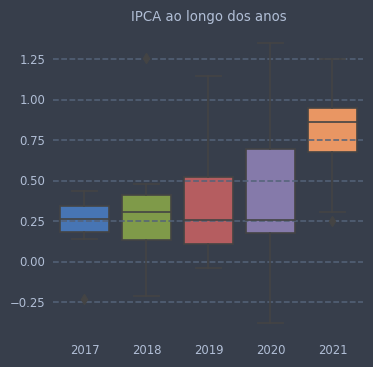

In [107]:
#Boxplot dos dados de IPCA ao longo dos anos de 2017 a 2021
sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')

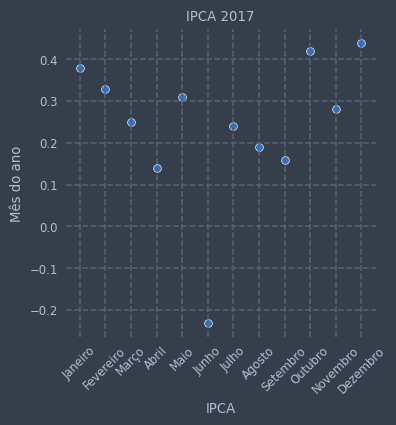

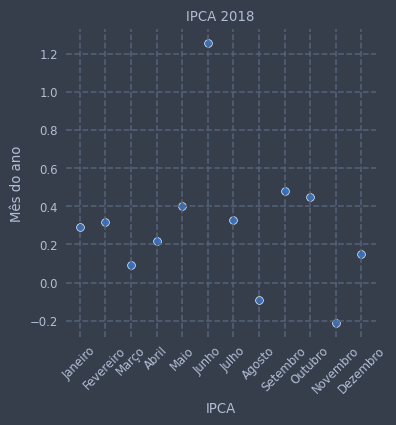

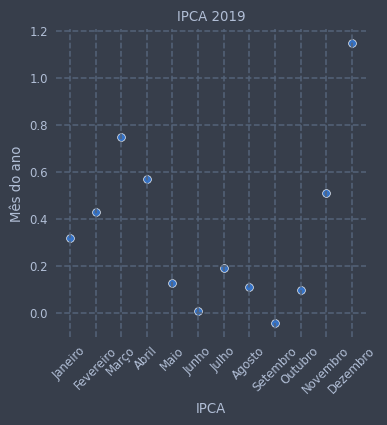

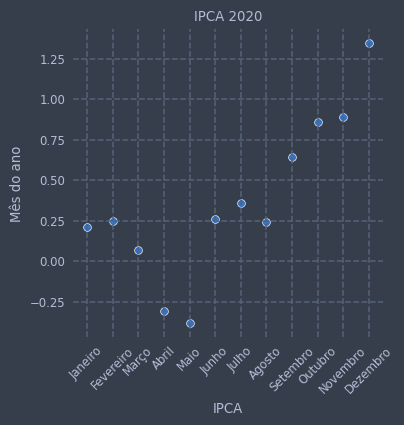

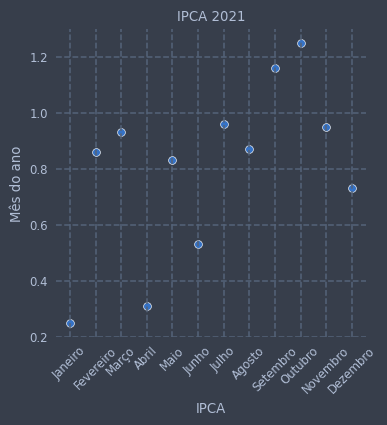

In [108]:
#Gráficos de disperção dos dados de IPCA por mes de cada ano entre 2017 e 2021
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x='Mes', y=cln)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')
    plt.xticks(rotation=45)
    plt.show()

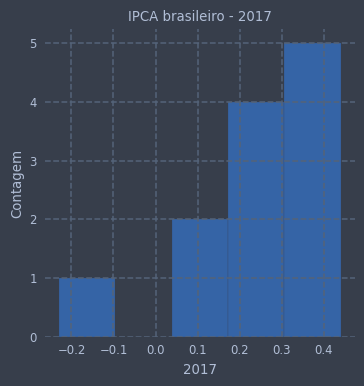

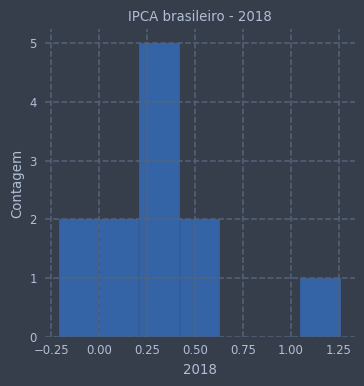

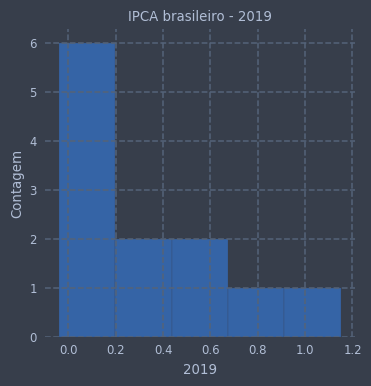

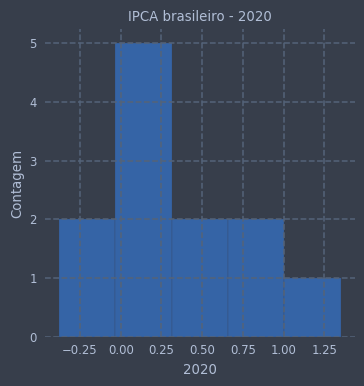

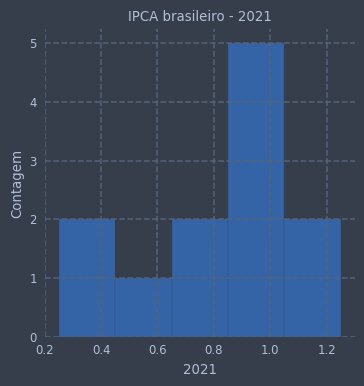

In [109]:
#Histogramas dos dados de IPCA por ano
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.histplot(dataIpcaMedio, x=cln).set_title(f"IPCA brasileiro - {cln}")

    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando o gráfico
    plt.show()

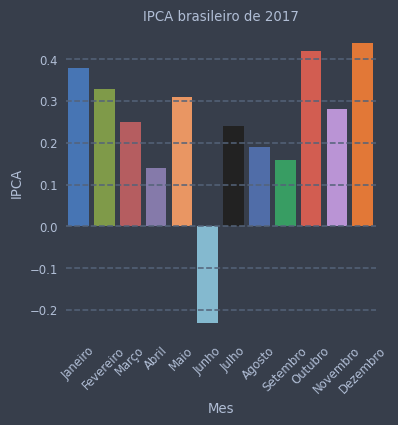

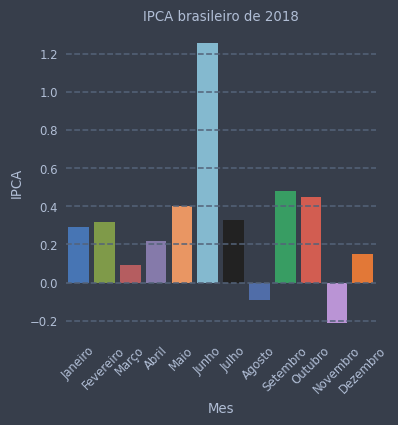

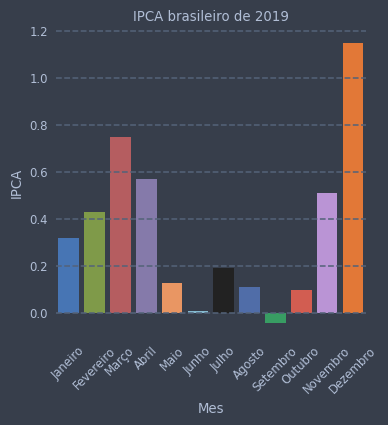

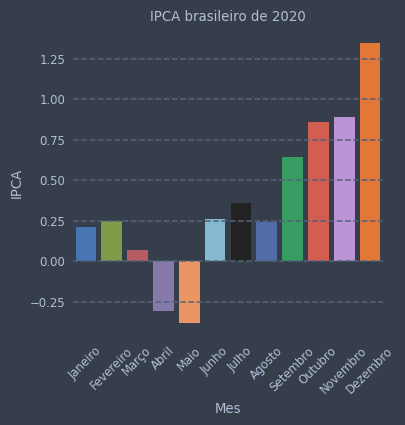

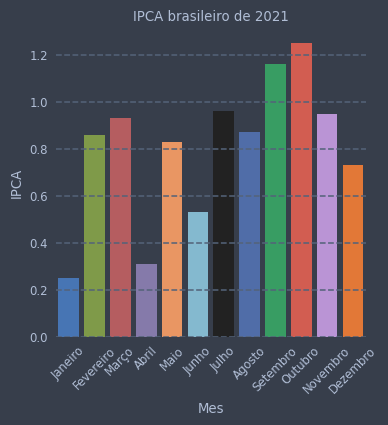

In [110]:
#Gráficos de barra dos dados de IPCA por mês ao longo dos anos entre 2017 e 2021
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.barplot(dataIpcaMedio, x='Mes', y=cln).set_title(f"IPCA brasileiro de {cln}")

    #Mudando nome do eixo y
    plt.ylabel("IPCA")

    #Rotacionando os títulos do eixo x
    plt.xticks(rotation=45)

    #Exibindo gráficos
    plt.show()